1. iris 이진 분류 모델

#### iris => 4개 꽃잎길이/너비 => 이진분류 : 100개 
      
- train -----------> 오차 값, 점수
- validation ------> trn에 대한 점수, val 점수

- test ------------>

- 'WT1 * x1 + x0 + WT2 * 2+b = 0'


In [28]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
file = '../data/iris.csv'
irisDF = pd.read_csv(file)

In [29]:
# 컬럼명 확인
irisDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [30]:
# 타겟 -- 피처 분리
targetSR = irisDF['variety'].iloc[:100]
featureDF = irisDF[irisDF.columns[:-1]].iloc[:100]

# 타겟 값을 수치데이터로 형 변환
targetSR = targetSR.replace({'Setosa':0, 'Versicolor':1})

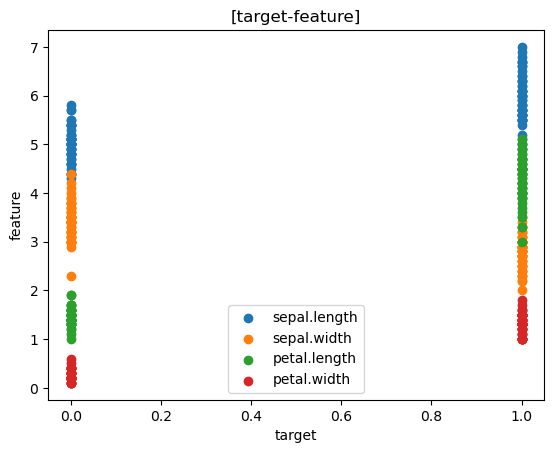

In [31]:
# 타겟과 피처 데이터 분포
plt.title('[target-feature]')
plt.xlabel('target')
plt.ylabel('feature')
for i in featureDF.columns :
    plt.scatter(targetSR, featureDF[i], label = i)
    plt.legend()
plt.show()

# => 0과 1로 대체된 setosa와 versicolor의 각 데이터가 도출되었다.

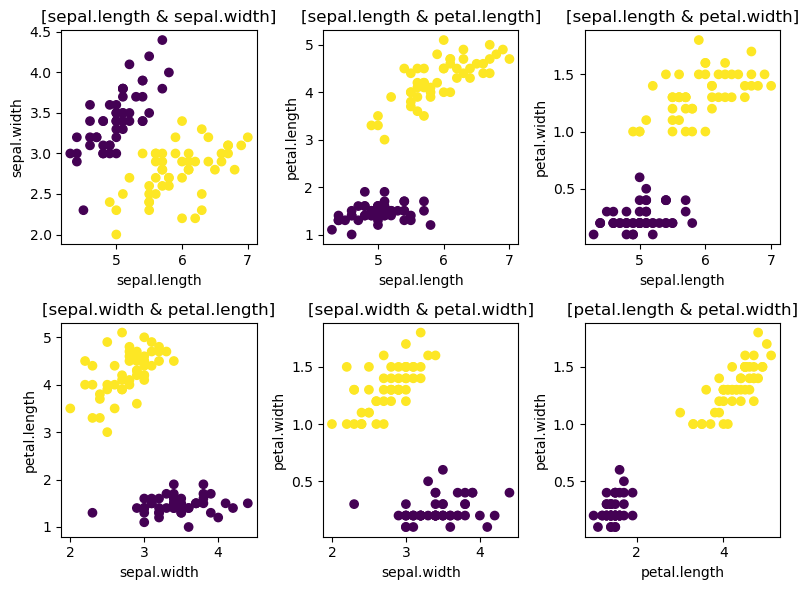

In [32]:
# 피처 - 피처 scatter 그래프 그리기
from itertools import combinations

ftreCol = featureDF.columns

print(combinations(ftreCol, 2)) # 출력값 <itertools.combinations object at 0x000001D06FFD6180> 

#print('가능한 경우의 수 : ', len(list(combinations(ftreCol, 2))))


n = 1
plt.figure(figsize=(8, 6))
for i, v in combinations(ftreCol, 2) : 
    #print(i, v) >> 출력값 확인 용도
    plt.subplot(2, 3, n)
    plt.title(f'[{i} & {v}]')
    plt.scatter(featureDF[i], featureDF[v], c = targetSR)
    plt.xlabel(i)
    plt.ylabel(v)
    n+=1

    if n>6 :
        break

plt.tight_layout()  # subplot 간의 간격 조정
plt.show()

In [33]:
# 타겟 정보 확인
print(f'[정보 확인] :\n{targetSR.value_counts()}\n')
print(featureDF.head(2))

[정보 확인] :
variety
0    50
1    50
Name: count, dtype: int64

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2


In [34]:
# 훈련용 데이터와 테스트용 데이터로 분리
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(featureDF, targetSR, test_size = 0.2, stratify=targetSR, random_state=31)

# 값 확인
print(f'X_train : {X_trn.shape}')
print(f'X_test : {X_tst.shape}')
print(f'y_train : {y_trn.shape}')
print(f'y_test : {y_tst.shape}')

X_train : (80, 4)
X_test : (20, 4)
y_train : (80,)
y_test : (20,)


In [35]:
# 스케일링
from sklearn.preprocessing import StandardScaler

# 인스턴스 생성
std_mdl = StandardScaler()


std_mdl.fit(X_trn)

std_X_trn = std_mdl.transform(X_trn)
std_X_tst = std_mdl.transform(X_tst)

In [36]:
# 모델 학습
from sklearn.svm import SVC

cList = [0.000001, 0.001, 0.01, 1, 10]
trnList =[]
tstList = []
for c in cList :
    svc_mdl = SVC(kernel='linear', C = c, probability=True) # kernel 지정 안 하면 가우시안 됨.
    svc_mdl.fit(std_X_trn, y_trn)

    # 테스트
    trnScore =svc_mdl.score(std_X_trn, y_trn)
    tstScore =svc_mdl.score(std_X_tst, y_tst)

    #리스트에 각각의 점수 저장.
    trnList.append(trnScore)
    tstList.append(tstScore)

    # 테스트 결과 출력 
print(f'train = {trnList}\ntest = {tstList}')

train = [1.0, 1.0, 1.0, 1.0, 1.0]
test = [1.0, 1.0, 1.0, 1.0, 1.0]


<Axes: >

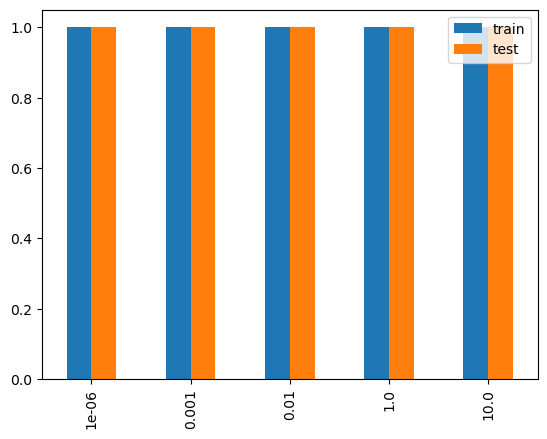

In [37]:
# 시각화를 통해 점수 비교
scoreDF = pd.DataFrame({'train':trnList, 'test':tstList}, index=cList)
scoreDF

scoreDF.plot(kind='bar') # 점수 비교하려고 했는데...

In [38]:
svc_mdl.support_vectors_ # 서포트 벡터스의 좌표값.

array([[-1.52766194, -1.65595711, -1.07123419, -0.84710036],
       [-0.73612726,  0.87141781, -0.86339571, -0.31489071],
       [-0.57782032, -1.23472795,  0.10651722,  0.57212538],
       [-0.8944342 , -1.44534253,  0.31435571,  0.39472216]])

In [39]:
sv = svc_mdl.support_vectors_.T
sv[0], sv[1]

(array([-1.52766194, -0.73612726, -0.57782032, -0.8944342 ]),
 array([-1.65595711,  0.87141781, -1.23472795, -1.44534253]))

In [40]:
# 예측 / 성능 평가
y_pre = svc_mdl.predict(std_X_tst)
print(f'y_pre : {y_pre}\n')
print(f'predict proba :\n', svc_mdl.predict_proba(std_X_tst)) # 모델에 probability = True 할당해야 사용 가능. / support_vector / probA_ / pro

y_pre : [0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1]

predict proba :
 [[9.78386906e-01 2.16130938e-02]
 [9.20174129e-01 7.98258707e-02]
 [9.82425868e-01 1.75741316e-02]
 [8.22312166e-03 9.91776878e-01]
 [1.15558554e-01 8.84441446e-01]
 [9.75217212e-01 2.47827875e-02]
 [1.66364190e-05 9.99983364e-01]
 [6.81327443e-03 9.93186726e-01]
 [9.59149429e-01 4.08505705e-02]
 [6.77018996e-03 9.93229810e-01]
 [9.81788816e-01 1.82111845e-02]
 [9.52922477e-01 4.70775230e-02]
 [9.67333770e-01 3.26662297e-02]
 [9.73607737e-01 2.63922631e-02]
 [5.27699384e-03 9.94723006e-01]
 [1.90005464e-02 9.80999454e-01]
 [9.54678449e-03 9.90453216e-01]
 [1.04715089e-02 9.89528491e-01]
 [9.74276833e-01 2.57231673e-02]
 [6.38157908e-02 9.36184209e-01]]


In [41]:
# 새 데이터로 predict하기.
# newData = std_mdl.transform([[1.1, 0.1]])
# svc_mdl.predict(newData)
# svc_mdl.decision_function(newData)
# newData[0][0], newData[0][1]
# newData.coef_[0][0] * newData[0][0] + svc_mdl.coef[0][1]*newData[0][1]+

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_true: 실제 타깃 레이블이 담긴 1차원 배열 ==> y_테스트 데이터

# y_pred: 예측한 레이블이 담긴 1차원 배열 ==> 모델.predict(x_테스트 데이터)


aScore = accuracy_score(y_tst, y_pre)
f1 = f1_score(y_tst, y_pre)
preScore = precision_score(y_tst, y_pre)
rcllScore = recall_score(y_tst, y_pre)
clf_rpt = classification_report(y_tst, y_pre)

print(f'accuracy : {aScore}')
print(f'f1 Score : {f1}')
print(f'precision Score : {preScore}')
print(f'recall Score : {rcllScore}')
print()
print(f'[classification report]:\n{clf_rpt}')
print()
print

accuracy : 1.0
f1 Score : 1.0
precision Score : 1.0
recall Score : 1.0

[classification report]:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20




<function print>

In [98]:
from sklearn.svm import SVC

fDF = irisDF[['petal.length', 'petal.width']].iloc[:100]
targetSR = irisDF['variety'].iloc[:100]
targetSR = targetSR.replace({'Setosa':0, 'Versicolor':1})

mdl = SVC(kernel='linear', C = 1)
mdl.fit(fDF, targetSR)

SVC(C=1, kernel='linear')

In [99]:
w = mdl.coef_[0]
# coef_[0]의 반환값은 직선의 방정식 ax+by+c = 0 에서 a에, coef_[1]은 b에 해당한다.
# mdl.coef는 2차원 데이터라는 사실을 잊으면 안됨!
w

array([1.1, 0.7])

In [100]:
mdl.intercept_

array([-3.27999997])

In [101]:
# y = -a/bx * - c/b(y = mx + n)을 이용해서 y의 좌표를 구할 수 있다.
# - a/b =  -w[0]/w[1]

m = -w[0]/w[1] # 기울기
n = (mdl.intercept_[0]/w[1])
#petal_length의 최솟값 - 최댓값 (x의 범위 = x 정의역)
x = np.linspace(fDF[fDF.columns[0]].min(), fDF[fDF.columns[0]].max()) 

# y절편 (c/b = mdl.intercept_[0]/w[1]) ==> 결정 경계
y = m * x - n


In [102]:
# ||w|| : 놈 (norm)
# squrt() = x 제곱근 중 음수가 아닌 값.
margin = 1/np.sqrt(np.sum(mdl.coef_**2)) 
# -----> 복습 필요

In [111]:
y_down = y - np.sqrt(1 + m**2) * margin
y_up = y + np.sqrt(1 + m**2) * margin

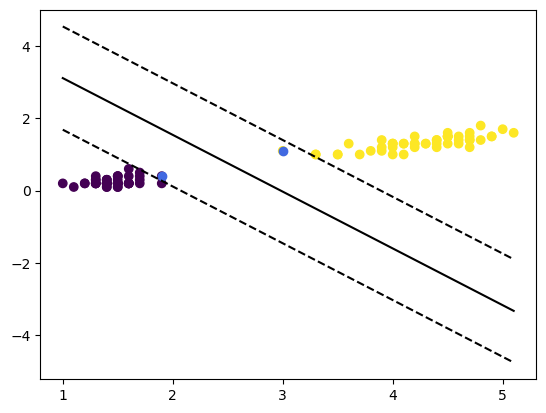

In [112]:
plt.plot(x, y, 'k-')
plt.plot(x, y_down, 'k--')
plt.plot(x, y_up, 'k--')
plt.scatter(fDF['petal.length'], fDF['petal.width'], c = targetSR)
plt.scatter(mdl.support_vectors_[:,0], mdl.support_vectors_[:,1], color = 'royalblue')
plt.show()